In [1]:
import numpy as np

In [2]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

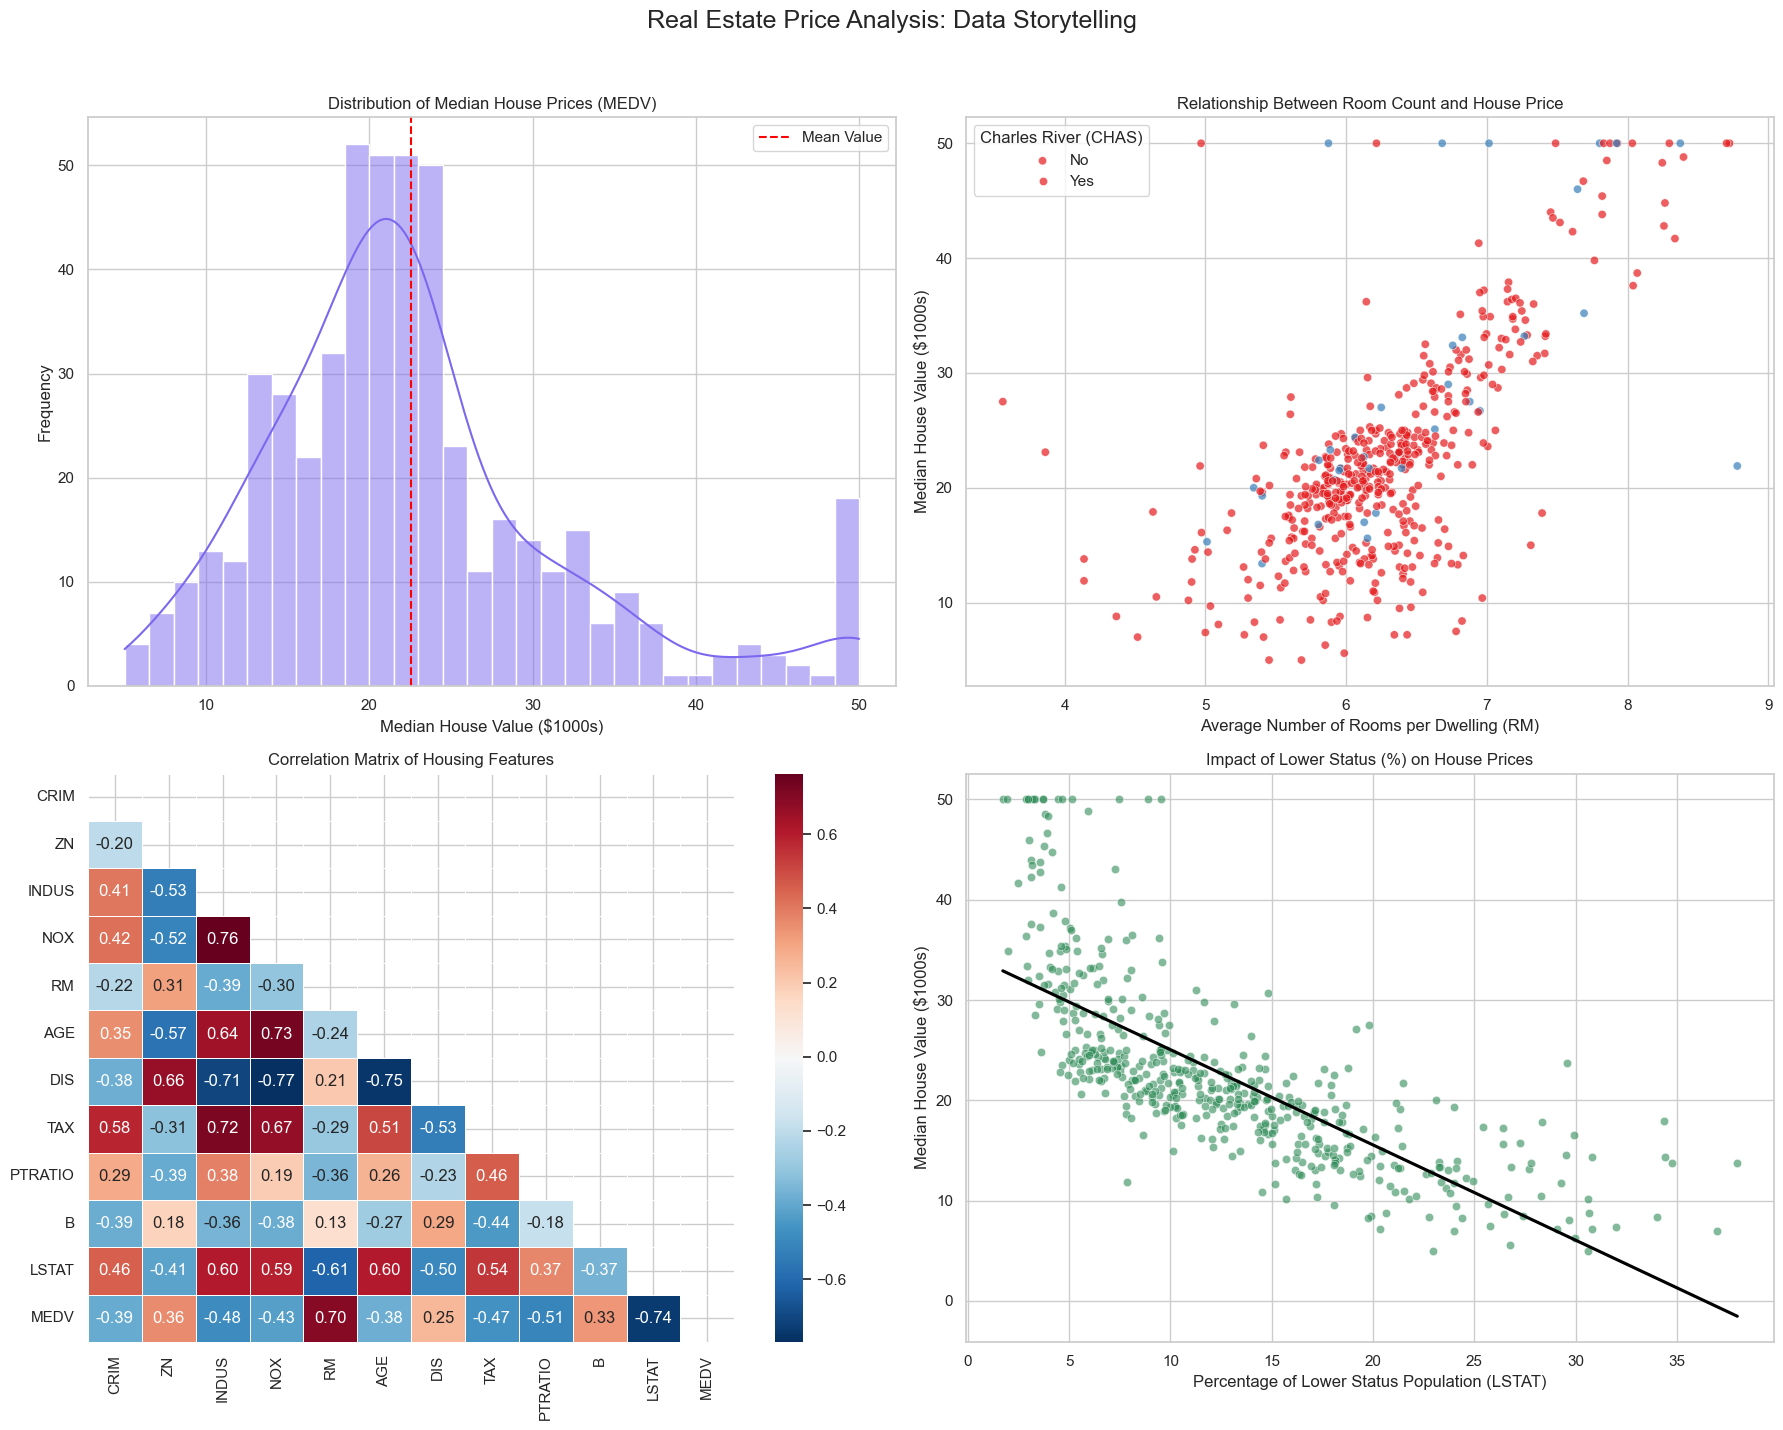

In [3]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load Boston dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame
df_clean = df.dropna()

# Set plot style
sns.set(style="whitegrid", palette="pastel")

# Create a 2x2 grid of plots
plt.figure(figsize=(18, 14))

# 1. Histogram: Distribution of House Prices
plt.subplot(2, 2, 1)
sns.histplot(df_clean['MEDV'], kde=True, color='mediumslateblue', bins=30)
plt.axvline(df_clean['MEDV'].mean(), color='red', linestyle='--', label='Mean Value')
plt.title('Distribution of Median House Prices (MEDV)')
plt.xlabel('Median House Value ($1000s)')
plt.ylabel('Frequency')
plt.legend()

# 2. Scatterplot: RM (rooms) vs MEDV with CHAS highlighting
plt.subplot(2, 2, 2)
sns.scatterplot(x='RM', y='MEDV', data=df_clean, hue='CHAS', palette='Set1', alpha=0.7)
plt.title('Relationship Between Room Count and House Price')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median House Value ($1000s)')
plt.legend(title='Charles River (CHAS)', labels=['No', 'Yes'])

# 3. Correlation Heatmap
plt.subplot(2, 2, 3)
corr = df_clean.corr(numeric_only=True)
mask = np.triu(corr)
sns.heatmap(corr, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of Housing Features')

# 4. LSTAT vs MEDV (Socioeconomic Status Impact)
plt.subplot(2, 2, 4)
sns.scatterplot(x='LSTAT', y='MEDV', data=df_clean, color='seagreen', alpha=0.6)
sns.regplot(x='LSTAT', y='MEDV', data=df_clean, scatter=False, color='black', ci=None)
plt.title('Impact of Lower Status (%) on House Prices')
plt.xlabel('Percentage of Lower Status Population (LSTAT)')
plt.ylabel('Median House Value ($1000s)')

# Final layout adjustment
plt.suptitle("Real Estate Price Analysis: Data Storytelling", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()
